In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
font10 = fm.FontProperties(fname=path, size=10)

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# parquet -> 대용량 데이터셋을 다루기 위한 확장자.
#csv -> 24만건 => 1.신용정보, .... 8.
#열 갯수 -> 700

In [ ]:
train_path = "/content/drive/MyDrive/card_train.csv"
test_path = "/content/drive/MyDrive/card_test.csv"

In [ ]:
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')

In [ ]:
train_df .shape

(70560, 738)

In [ ]:
train_df.head()

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E


In [ ]:
for i in train_df.columns:
  print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
X = train_df.drop(columns = ["ID", "Unnamed: 0.1", "Segment.1", "Segment"])
Y = train_df["Segment"]

In [ ]:
Y

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


## 1. 738개의 열을 어떻게 뽑아내서 붙일 것인가?

In [ ]:
for i in train_df.columns:
  print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
# if.최근 3개월 간의 자료
recent3 = [m for m in X.columns if 'R3M' in m]
print(recent3)
x_train = X[recent3]

# if.최근 12개월 간의 자료
#recent12 = [m for m in X.columns if 'R12M' in m]
#print(recent12)
#x_train = X[recent12]

['청구서발송여부_R3M', '청구금액_R3M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R3M', '포인트_이용포인트_R3M', '마일_적립포인트_R3M', '마일_이용포인트_R3M', '할인건수_R3M', '할인금액_R3M', '할인금액_청구서_R3M', '상환개월수_결제일_R3M', '선결제건수_R3M', '연체건수_R3M', '혜택수혜금액_R3M', '특별한도보유여부_R3M', '연체감액여부_R3M', '혜택수혜율_R3M', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '홈페이지_금융건수_R3M', '홈페이지_선결제건수_R3M', 'RV_평균잔액_R3M', 'RV_최대잔액_R3M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_할부_유이자_R3M', '이용건수_할부_무이자_R3M', '이용건수_부분무이자_R3M', '이용건수_CA_R3M', '이용건수_체크_R3M', '이용건수_카드론_R3M', '이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_할부_유이자_R3M', '이용금액_할부_무이자_R3M', '이용금액_부분무이자_R3M', '이용금액_CA_R3M', '이용금액_체크_R3M', '이용금액_카드론_R3M', '이용개월수_신용_R3M', '이용개월수_신판_R3M', '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_할부_유이자_R3M', '이용개월수_할부_무이자_R3M', '이용개월수_부분무이자_R3M', '이용개월수_CA_R3M', '이용개월수_체크_R3M', '이용개월수_카드론_R3M', '이용금액_온라인_R3M', '이용금액_오프라인_R3M', '이용건수_온라인_R3M', '이용건수_오프라인_R3M', '이용금액_페이_온라인_R3M', '이용금액_페

In [ ]:
x_train.head()

,청구서발송여부_R3M,청구금액_R3M,포인트_마일리지_건별_R3M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,포인트_이용포인트_R3M,마일_적립포인트_R3M,마일_이용포인트_R3M,...,이용금액_연체_R3M,이용개월수_전체_R3M,이용개월수_결제일_R3M,건수_할부전환_R3M,금액_할부전환_R3M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M
0,1,1678,0,0,0,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,0
1,1,7778,0,0,0,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,15957,0,3743,0,0,3743,2285,0,0,...,0,3,3,0,0,0,0,0,0,0
4,1,2661,0,0,0,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,0


In [ ]:
name = [x for x in x_train.columns if x_train[x].dtype == 'object']

In [ ]:
name

['할인건수_R3M']

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train['할인건수_R3M'].unique()

array(['1회 이상', '10회 이상', '20회 이상', '30회 이상'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['할인건수_R3M'] = le.fit_transform(x_train['할인건수_R3M'])

<ipython-input-44-4dc9050408e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['할인건수_R3M'] = le.fit_transform(x_train['할인건수_R3M'])


In [ ]:
#DT, RF -> 계열이 과적합
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train, Y)



## 2. 클래스 불균형




In [ ]:
Y.value_counts()

,count
Segment,
E,56505
D,10270
C,3753
A,28
B,4


## Feature Importance 분석

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.154251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30990
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 246
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


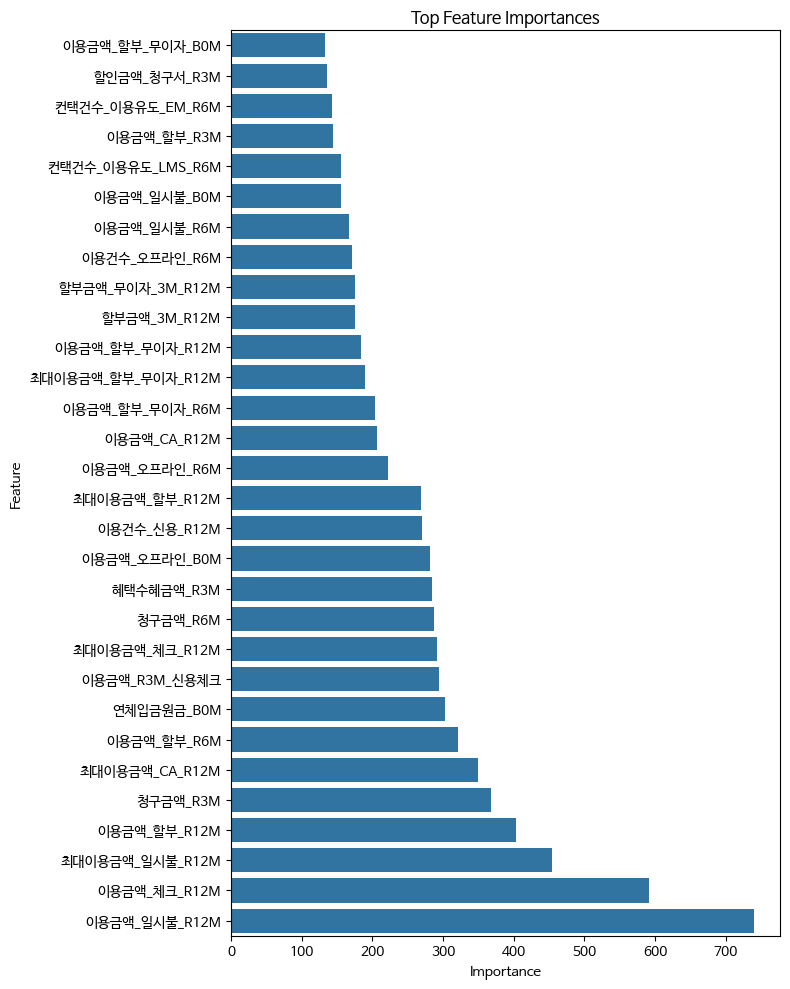

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np


# ------------------------------------------------

# 1. Load dataset
train_df = pd.read_csv("/content/drive/MyDrive/card_train.csv")
y = train_df["Segment"]
X_full = train_df.drop(columns=["ID", "Unnamed: 0.1", "Segment.1", "Segment"], errors="ignore")

# 2. Feature selection by keyword
def select_features_by_keywords(df, keywords, time_filters=["B0M", "R3M", "R6M", "R12M"]):
    return df[[col for col in df.columns if any(k in col for k in keywords) and any(t in col for t in time_filters)]]

# 3. Train & evaluate
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

# 4. Importance plot
def plot_feature_importance(model, feature_names, top_n=30):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# 실행: 키워드만 바꾸면 계속 실험 가능
keywords = ["이용", "금액", "연체"]
X_selected = select_features_by_keywords(X_full, keywords)
model, score = train_model_with_keywords(X_selected, y)
print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)
